In [28]:
# Dependencies and Setup
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

Create a DataFrame with the Top 100 most streamed songs in Spotify

In [29]:
# Load the CSV file into a Pandas DataFrame
dataset_df = pd.read_csv("spotify-2023.csv",encoding='latin-1')
#Remove row 574 because data is not representative
dataset_df = dataset_df.drop(574,axis=0)
#Modify column streams to type int64
dataset_df['streams'] = dataset_df['streams'].astype('int64')
#Modify column 'in deezer playlists' to float64
dataset_df['in_deezer_playlists'] = dataset_df['in_deezer_playlists'].replace(to_replace=',',value='',regex=True)
dataset_df['in_deezer_playlists'] = dataset_df['in_deezer_playlists'].astype('float64')
# Devide the stream values by 1,000,000 to express it in million
streams_mil=(dataset_df[['streams']]/1000000).round(2)
dataset_df['streams mil'] = streams_mil
# Sort the DataFrame in descending order by number of streams
streams_df=dataset_df.sort_values('streams',ascending=False)
# Create a new dataframe with the sample of the 100 most streamed songs in Spotify
top100_streams_df = streams_df.iloc[:100]
#Display dataframe
top100_streams_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams mil
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,C#,Major,50,38,80,0,0,9,7,3703.90
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,C#,Minor,83,93,65,58,0,9,8,3562.54
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,C#,Major,50,45,41,75,0,11,3,2887.24
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,F#,Minor,82,54,59,69,0,18,10,2864.79
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,D,Major,76,91,50,54,0,7,5,2808.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Shivers,Ed Sheeran,1,2021,9,9,10147,30,1302184087,234,...,D,Major,79,82,86,28,0,4,9,1302.18
401,Heather,Conan Gray,1,2020,3,20,6170,7,1301799902,82,...,F,Major,47,25,43,62,0,32,3,1301.80
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,...,NaN,Minor,48,44,42,12,2,11,3,1297.03
820,Iris,The Goo Goo Dolls,1,1998,3,31,13101,9,1284942608,137,...,B,Minor,32,49,72,0,0,9,4,1284.94


Analysis by Artist

In [40]:
# Distribution by artist
artist_count = len(top100_streams_df['artist(s)_name'].unique())
print(f'There are {artist_count} artists among the most streamed songs')

artists = top100_streams_df.groupby('artist(s)_name')
artists_df = pd.DataFrame(artists['artist(s)_name'].count()).rename(columns={'artist(s)_name':'No of songs'}).reset_index()
artists_df2=artists_df.sort_values('No of songs',ascending=False)
artists_df2

There are 77 artists among the most streamed songs


,artist(s)_name,No of songs
23,Ed Sheeran,6
71,The Weeknd,5
24,Eminem,3
30,Harry Styles,3
10,Bruno Mars,3
...,...,...
36,James Arthur,1
37,John Legend,1
39,Justin Bieber,1
40,"Justin Bieber, Daniel Caesar, Giveon",1


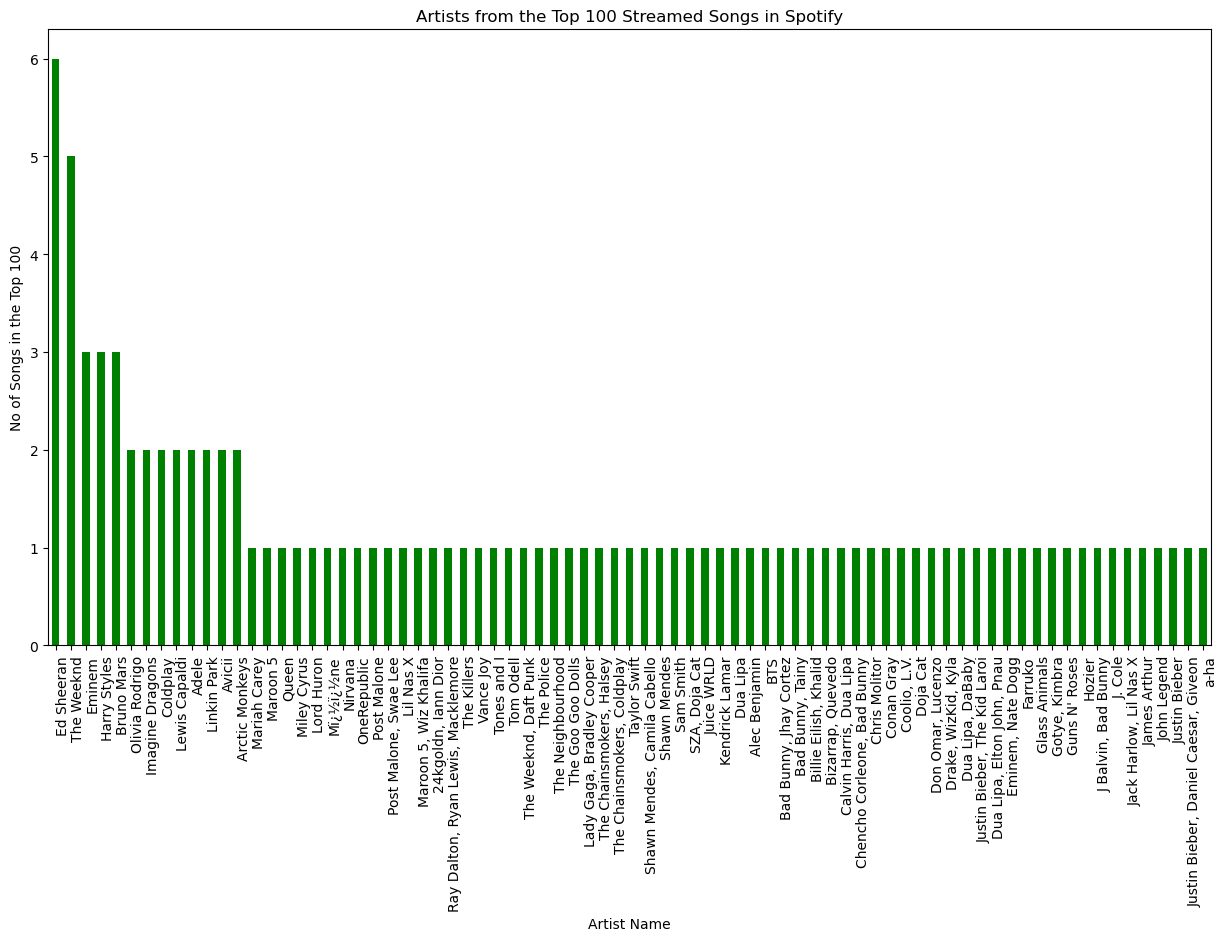

In [44]:
bar_chart=artists_df2.plot(kind='bar',facecolor='green',alpha=1,xlabel="Artist Name",ylabel="No of Songs in the Top 100",legend=False,figsize=(15,8),title='Artists from the Top 100 Streamed Songs in Spotify')
xticklabels = artists_df2["artist(s)_name"]
bar_chart.set_xticklabels(xticklabels, rotation=90, rotation_mode='anchor', ha='right',fontsize=10)
plt.show()

Analysis of Songs Attributes

In [30]:
# Analysis of the mode
mode = top100_streams_df.groupby('mode')
mode_df = pd.DataFrame(mode['mode'].count()).rename(columns={'mode':'count'}).reset_index()
mode_df

,mode,count
0,Major,64
1,Minor,36


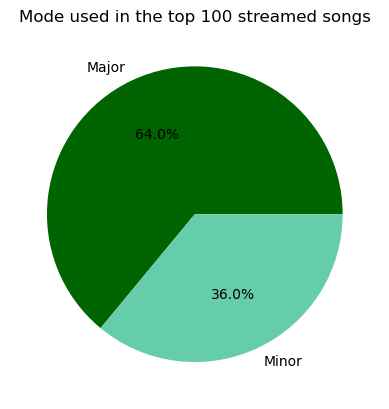

In [31]:
# Generate a pie plot with the mode information
pie_chart=mode_df['count'].plot(kind='pie',title='Mode used in the top 100 streamed songs',ylabel='',labels=mode_df['mode'],colors=['darkgreen','mediumaquamarine'],autopct="%1.1f%%")
plt.show()

In [32]:
# Analysis of the key
# Drop any rows with null values
top100_streams_df_reduced = top100_streams_df.dropna()
top100_streams_df_reduced

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams mil
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,C#,Minor,83,93,65,58,0,9,8,3562.54
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,D,Major,76,91,50,54,0,7,5,2808.10
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,C#,Major,77,36,63,1,0,36,5,2713.92
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,C#,Major,59,48,76,4,0,10,5,2665.34
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,A#,Minor,77,74,78,4,0,23,11,2594.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,"Quevedo: Bzrp Music Sessions, Vol. 52","Bizarrap, Quevedo",2,2022,7,6,8506,45,1356565093,94,...,D,Major,62,55,78,1,3,23,4,1356.57
37,Blank Space,Taylor Swift,1,2014,1,1,11434,53,1355959075,154,...,F,Major,75,57,68,9,0,13,6,1355.96
790,Callaita,"Bad Bunny, Tainy",2,2019,5,31,9539,15,1304313953,162,...,D,Major,61,24,62,60,0,24,31,1304.31
401,Heather,Conan Gray,1,2020,3,20,6170,7,1301799902,82,...,F,Major,47,25,43,62,0,32,3,1301.80


In [33]:
# Create a dataframe 
key = top100_streams_df_reduced.groupby('key')
key_df = pd.DataFrame(key['key'].count()).rename(columns={'key':'count'}).reset_index().sort_values('count',ascending=False)
key_df

,key,count
3,C#,15
7,F,10
4,D,9
2,B,7
10,G#,6
6,E,5
8,F#,4
9,G,4
1,A#,3
5,D#,3


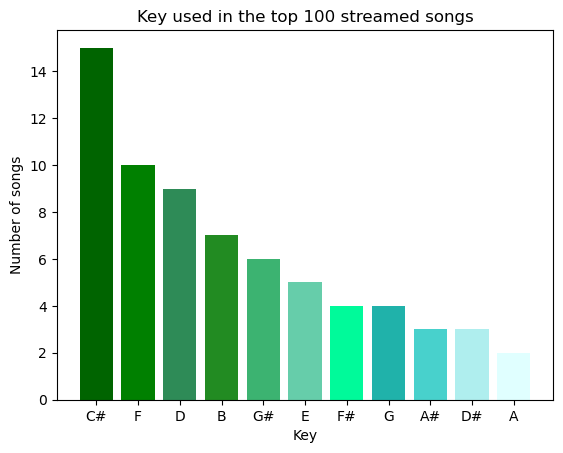

In [34]:
# Chart summarizing the key analysis
colors = ['darkgreen','green','seagreen','forestgreen','mediumseagreen','mediumaquamarine','mediumspringgreen','lightseagreen','mediumturquoise','paleturquoise','lightcyan']
plt.bar(key_df['key'],key_df['count'],color=colors)
plt.title('Key used in the top 100 streamed songs')
plt.xlabel('Key')
plt.ylabel('Number of songs')
plt.show()

In [35]:
# Analysis of number of artists in a song
artistcount = top100_streams_df.groupby('artist_count')
artistcount_df = pd.DataFrame(artistcount['artist_count'].count()).rename(columns={'artist_count':'count'}).reset_index().sort_values('count',ascending=False)
artistcount_df

,artist_count,count
0,1,73
1,2,23
2,3,4


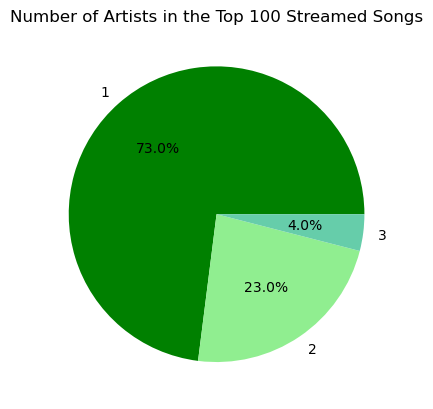

In [36]:
# Generate a pie plot with the information about the number of artists in a song
pie_chart=artistcount_df['count'].plot(kind='pie',ylabel='',labels=artistcount_df['artist_count'],colors=['green','lightgreen','mediumaquamarine'],autopct="%1.1f%%",title='Number of Artists in the Top 100 Streamed Songs')
plt.show()

Number of Streams in Spotify vs. Presence in Playlists (from different platforms)

PearsonRResult(statistic=0.34807793815879595, pvalue=0.00038718844147505433)


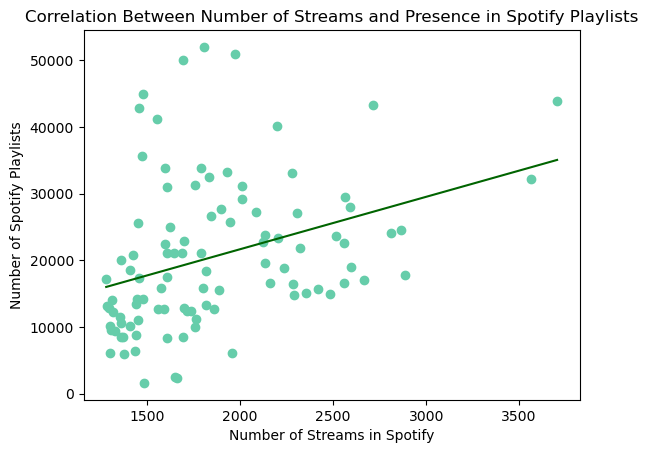

In [37]:
# Correlation between presence in spotify playlists and in apple playlists

spotify = top100_streams_df['in_spotify_playlists']

correlation = st.pearsonr(streams,spotify)
print(correlation)

plt.scatter(streams,spotify,marker="o", facecolors="mediumaquamarine", edgecolors="mediumaquamarine")
plt.xlabel("Number of Streams in Spotify")
plt.ylabel("Number of Spotify Playlists")
plt.title("Correlation Between Number of Streams and Presence in Spotify Playlists")

e_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(streams,spotify)
pe_fit = e_slope * streams + pe_int
plt.plot(streams,pe_fit,color='darkgreen')

plt.show()

PearsonRResult(statistic=0.5425091302221763, pvalue=5.531555838348728e-09)


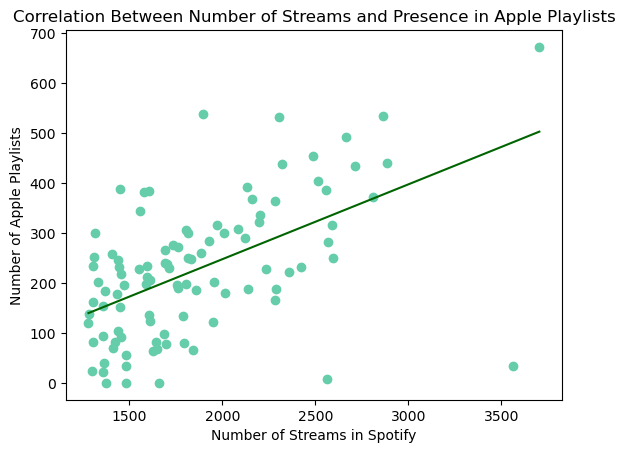

In [38]:
# Correlation between presence in spotify playlists and in apple playlists

streams = top100_streams_df['streams mil']
apple = top100_streams_df['in_apple_playlists']

correlation = st.pearsonr(streams,apple)
print(correlation)

plt.scatter(streams,apple,marker="o", facecolors="mediumaquamarine", edgecolors="mediumaquamarine")
plt.xlabel("Number of Streams in Spotify")
plt.ylabel("Number of Apple Playlists")
plt.title("Correlation Between Number of Streams and Presence in Apple Playlists")

e_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(streams,apple)
pe_fit = e_slope * streams + pe_int
plt.plot(streams,pe_fit,color='darkgreen')

plt.show()

PearsonRResult(statistic=0.1604824394559296, pvalue=0.11071127912564706)


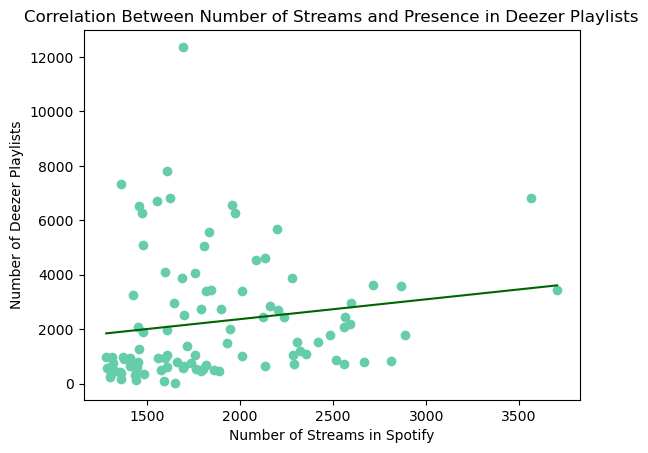

In [39]:
# Correlation between presence in spotify playlists and in deezer playlists

deezer = top100_streams_df['in_deezer_playlists']

correlation = st.pearsonr(streams,deezer)
print(correlation)

plt.scatter(streams,deezer,marker="o", facecolors="mediumaquamarine", edgecolors="mediumaquamarine")
plt.xlabel("Number of Streams in Spotify")
plt.ylabel("Number of Deezer Playlists")
plt.title("Correlation Between Number of Streams and Presence in Deezer Playlists")

e_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(streams,deezer)
pe_fit = e_slope * streams + pe_int
plt.plot(streams,pe_fit,color='darkgreen')

plt.show()